# Project in R and MongoDB
### Name: Ajay Anil Thorve
### Net ID: aat414
### N number: N13008057
### Course: Big Data Analytics

## Project Description

During the Demonetization phase in India November 2016- April 2017, I subscribe tweets from various days and analyze the top most topics trending during that time. I also compute sentiment analysis of overall tweets each day for 8 different days during this time period and observe if there was any shift in emotions towards the decision

## Technology Used

1. R langauge for scripting.
2. Mongodb for the backend.
3. R's Mongolite package for connection of R to mongo
4. SQL on ibm cloud
5. RMySQL package


## Using the Data

#### 1) Importing the required libraries

In [15]:
library(ggplot2);
library(dplyr);
library(maps);
library(ggmap);
library(mongolite);
library(lubridate);
library(gridExtra);
library("data.table");

### The dataset:

#### I decided to work on the tweets related to demonetization. Since the topic was trending on twitter for a lot of time when prime minister of India, Narendra Modi, announced the decision in November 2016, I decided to pull tweets during that period and do some week wise analysis on the reaction to this decision.

<i>Since twitter does not allow to pull tweets which are more than 2 weeks old anymore(its a paid fearture). I tried researching on the internet if there are any tweets scrapped already. I found a dataset which consisted of some of the tweets during the November 2016 period, on this link: https://www.kaggle.com/arathee2/demonetization-in-india-twitter-data/downloads/demonetization-tweets.csv</i>

In [16]:
#Working with twitter data, importing the csv file to a dataframe in r
tweet_data <- data.table::fread("demonetization-tweets 2.csv")

In [17]:
#see what fields this dataframe has
colnames(tweet_data)

[1] "V1"            "X"             "text"          "favorited"    
 [5] "favoriteCount" "replyToSN"     "created"       "truncated"    
 [9] "replyToSID"    "id"            "replyToUID"    "statusSource" 
[13] "screenName"    "retweetCount"  "isRetweet"     "retweeted"

In [18]:
head(tweet_data,3)

V1,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
1,1,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,FALSE,0,NA,11/23/16 18:40,FALSE,NA,8.01496e+17,NA,"<a href=""""http://twitter.com/download/android"""" rel=""""nofollow"""">Twitter for Android</a>",HASHTAGFARZIWAL,331,TRUE,FALSE
2,2,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,FALSE,0,NA,11/23/16 18:40,FALSE,NA,8.01496e+17,NA,"<a href=""""http://twitter.com/download/android"""" rel=""""nofollow"""">Twitter for Android</a>",PRAMODKAUSHIK9,66,TRUE,FALSE
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization. If not for Aam Aadmi, listen to th…",FALSE,0,NA,11/23/16 18:40,FALSE,NA,8.01496e+17,NA,"<a href=""""http://twitter.com/download/android"""" rel=""""nofollow"""">Twitter for Android</a>",rahulja13034944,12,TRUE,FALSE


In [19]:
#Since I am only working with dates, I strip the time factor from the "created" field, 
#and convert the datatype of the field to data format.
tweet_data$created <- as.Date(tweet_data$created, "%m/%d/%y")
head(tweet_data,3)

V1,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
1,1,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,FALSE,0,NA,2016-11-23,FALSE,NA,8.01496e+17,NA,"<a href=""""http://twitter.com/download/android"""" rel=""""nofollow"""">Twitter for Android</a>",HASHTAGFARZIWAL,331,TRUE,FALSE
2,2,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,FALSE,0,NA,2016-11-23,FALSE,NA,8.01496e+17,NA,"<a href=""""http://twitter.com/download/android"""" rel=""""nofollow"""">Twitter for Android</a>",PRAMODKAUSHIK9,66,TRUE,FALSE
3,3,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization. If not for Aam Aadmi, listen to th…",FALSE,0,NA,2016-11-23,FALSE,NA,8.01496e+17,NA,"<a href=""""http://twitter.com/download/android"""" rel=""""nofollow"""">Twitter for Android</a>",rahulja13034944,12,TRUE,FALSE


## Making a connection with mongodb database

<i>I am using the R package "mongolite"</i>

In [20]:
#estabish connection,create db and a collection named tweets inside
tweet_collection = mongo(collection = "tweets", db = "Twit_Sentiment_Analysis")

In [21]:
#just making sure the tweet_collection instance of tweets collection is empty before inserting
tweet_collection$remove('{}')
#insert tweet_data inside the collection
tweet_collection$insert(tweet_data)

List of 5
 $ nInserted  : num 14940
 $ nMatched   : num 0
 $ nRemoved   : num 0
 $ nUpserted  : num 0
 $ writeErrors: list()

## Making a connection with SQL database on ibm cloud

<b>conn <- dbConnect(dbDriver('MySQL'),host='localhost',user='aat414',password='aat414123',dbname='aat414')</b>

<i>#create a table demontization</i> <br>
<b>loadDataQuery <- "LOAD DATA LOCAL INFILE 
'/home/2017/fall/nyu/cs9223/aat414/R- midterm/1.csv' 
INTO TABLE tweet_collection FIELDS TERMINATED BY ',' ENCLOSED BY '\"' LINES TERMINATED BY '\\n' IGNORE 1 ROWS”</b>


### Performing a query and retrieving data

In [22]:
#equivalent in SQL to select * from tweet_collection where ROWNUM=1
tweet_collection$iterate()$one()

$V1
[1] 1

$X
[1] 1

$text
[1] "RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…"

$favorited
[1] FALSE

$favoriteCount
[1] 0

$created
[1] "2016-11-23"

$truncated
[1] FALSE

$id
[1] 8.01496e+17

$statusSource
[1] "<a href=\"\"http://twitter.com/download/android\"\" rel=\"\"nofollow\"\">Twitter for Android</a>"

$screenName
[1] "HASHTAGFARZIWAL"

$retweetCount
[1] 331

$isRetweet
[1] TRUE

$retweeted
[1] FALSE

In [23]:
# equivalent SQL query -> select text,created from tweet_collection LIMIT 5;
tweet_collection$find(fields='{"_id":false,"text":true,"created":true}',limit=5)

text,created
RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;…,2016-11-23
RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?,2016-11-23
"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization. If not for Aam Aadmi, listen to th…",2016-11-23
RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9…,2016-11-23
RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F,2016-11-23


### I want to group the tweets as per day; aggregate in mongo (similar to groupby in sql) may help achieve that!

#### Using monoglite helps process big amounts of data directly from the datastore, without the need to load it in a dataframe in R, which might slow down the process. Below, I process a query and direclty plot it, without storing it in a dataframe

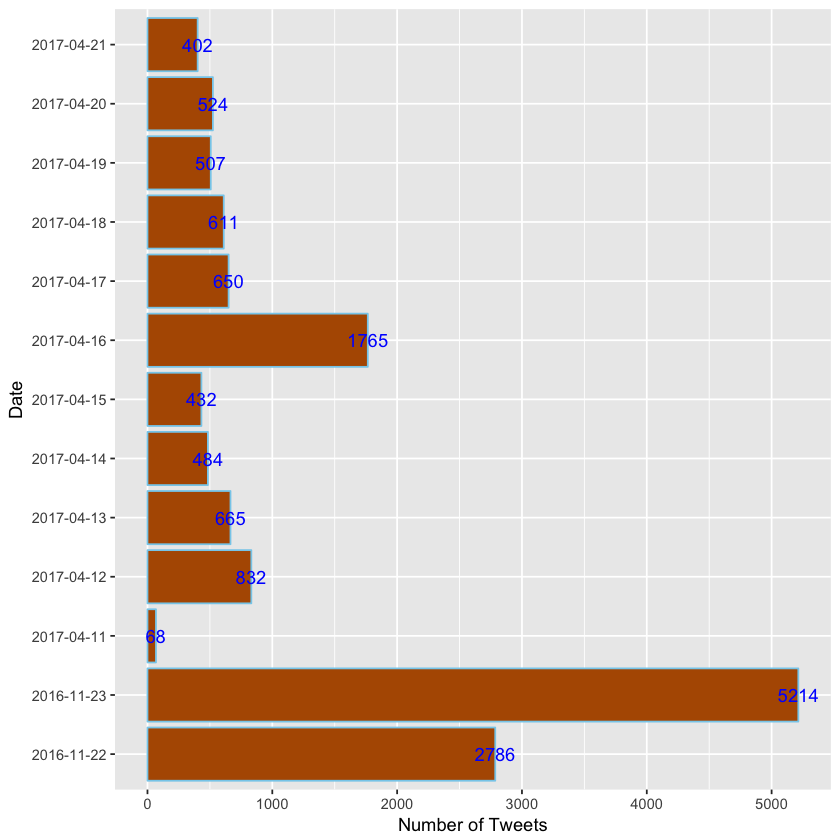

In [24]:
# equivalent to SQL query: select count(*) from tweet_collection group by created;

tweet_collection$aggregate('[{"$group": {"_id": "$created","count": {"$sum": 1}}}]')%>%
ggplot(aes(x=`_id`,y=count))+geom_bar(stat="identity",color='skyblue',fill='#b35900')+
geom_text(aes(label = count), color = "blue")+coord_flip()+xlab("Date")+ylab("Number of Tweets")

Now that I have tweets group by each day, I can perform sentiment analysis for each day and see how it changed over the days

But before that, lets see what the top terms used in tweets were. We will generate a wordcloud to show the top 50 words.

<br>

Let us clean the text first

In [25]:
#getting the tweets from the mongo database into a dataframe and sorting them as per date using R's order() function
tweets_dates <- tweet_collection$find(fields='{"text":true,"created":true}')
tweets_dates<-tweets_dates[order(tweets_dates$created),]

In [26]:
head(tweets_dates,3)

,_id,text,created
5215,59e8dda1c553ce84b80a6792,"RT @DrKumarVishwas: And the Oscar goes to """"Mr.<U+092D><U+093E><U+0935><U+0941><U+0915>"""" <ed><U+00A0><U+00BD><ed><U+00B8><U+00A9><ed><U+00A0><U+00BD><ed><U+00B8><U+00A5><ed><U+00A0><U+00BD><ed><U+00B8><U+00A2><ed><U+00A0><U+00BD><ed><U+00B8><U+00AD>#demonetization https://t.co/ObQrhlNSL6",2016-11-22
5216,59e8dda1c553ce84b80a6793,RT @ippatel: Retaining all seats of LS and state in Byelection by BJP has proved the people's support on #DeMonetization. It should be abov…,2016-11-22
5217,59e8dda1c553ce84b80a6794,"RT @DrKumarVishwas: And the Oscar goes to """"Mr.<U+092D><U+093E><U+0935><U+0941><U+0915>"""" <ed><U+00A0><U+00BD><ed><U+00B8><U+00A9><ed><U+00A0><U+00BD><ed><U+00B8><U+00A5><ed><U+00A0><U+00BD><ed><U+00B8><U+00A2><ed><U+00A0><U+00BD><ed><U+00B8><U+00AD>#demonetization https://t.co/ObQrhlNSL6",2016-11-22


### Cleaning the text content of the tweets

In [27]:
#required packages
library('tm');

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate



In [28]:
cleanText <- function(txt){
    txt.tweets <- VCorpus(VectorSource(txt))
    #lowercase
    txt.tweets <- tm_map(txt.tweets, content_transformer(tolower))
    # Remove numbers
    txt.tweets <- tm_map(txt.tweets, removeNumbers)
    #Remove english common words
    txt.tweets <- tm_map(txt.tweets, removeWords, stopwords("english"))
    #Remove punctuations
    txt.tweets <- tm_map(txt.tweets, removePunctuation)
    #Remove whitespaces
    txt.tweets<- tm_map(txt.tweets, stripWhitespace)
    
    #remove the word rt(retweet)
    txt.tweets<- tm_map(txt.tweets,content_transformer(function(x){return (gsub("rt","",x))}))

    
    return(txt.tweets)
}

In [29]:
tweet.txt_data <- cleanText(tweets_dates$text)
head(tweet.txt_data)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 6

### Generate wordcloud

In [30]:
library('wordcloud');

Loading required package: RColorBrewer


In [ ]:
#create a TermDocumentMatrix in order to generate the wordcloud
dtm <- TermDocumentMatrix(tweet.txt_data)
m <- as.matrix(dtm)
d <- data.frame(as.table(m))
head(d)

In [ ]:
#Generating a word cloud
wordcloud(d$Terms,d$Freq,min.freq = 1,
          max.words=50, col=terrain.colors(length(d$Terms), alpha=0.9))

### Sentiment Analysis

In [ ]:
library("syuzhet");

In [ ]:
sentiments <- get_sentiment(as.character(tweets_dates$text))

In [ ]:
tweets_dates$sentiments <- sentiments

In [ ]:
head(tweets_dates,2)

In [ ]:
tweet_sentiments = mongo(collection = "tweets_sentiments", db = "Twit_Sentiment_Analysis")

In [ ]:
tweet_sentiments$remove('{}')
tweet_sentiments$insert(tweets_dates)

In [ ]:
tweet_sentiments$find('{"created":"2017-04-19"}','{"sentiments":true}',limit=5)

In [ ]:
#group by each day and calculate the avg sentiment of tweets that day
tweet_sentiments$aggregate('[{"$group":{"_id":"$created","sentiments":{"$avg":"$sentiments"}}}]')

### Creating a Sentiment Analysis bar chart which displays the varying sentiments over the days during the demonetization phase

In [ ]:
tweet_sentiments$aggregate('[{"$group":{"_id":"$created","sentiments":{"$avg":"$sentiments"}}}]')%>%
ggplot(aes(x=`_id`,y=sentiments,fill=sentiments))+scale_fill_gradient(low = "red", high = "green")+
geom_bar(stat="identity")+coord_flip()+xlab("Date")+ylab("Overall public Sentiment")

### Results and Discoveries

<i>
1. Initially when the decision was made in the month of november to stop the notes of 500 and 1000 in a very short amount of time, people were slightly happy or neutral. 
2.  On 11th April, as can be seen, there were a lot of hate tweets, this mostly summarizes the angst of people during that time, as people were facing a lot of inconvenience. 
3. However in the next few days, when people realized there were more pros to the decision than cons, they whole heartedly supported the decision, and hence a flurry of positive tweets followed in the next few days</i>

### References
<i>
1. https://www.r-bloggers.com/
2. https://www.kaggle.com/arathee2/demonetization-in-india-twitter-data/downloads/demonetization-tweets.csv
3. https://github.com/jeroen/mongolite
</i>